# Setup

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import researchpy, numpy, pandas
import scipy.stats
from scipy import stats
import seaborn as sns
import math
import statistics
import researchpy as rp
import scipy.stats as stats

In [4]:
#De data binnenhalen
airline = pd.read_csv('Airlinesatisfaction.csv')

In [5]:
#Random steekproef van 100
random_subset = airline.sample(n=100)

We beginnen met het verwijderen van enkele kolommen uit onze dataset die we als onnodig beschouwen voor onze analyse. 

De kolommen die we gaan verwijderen zijn:

- `id`: Dit is een unieke identifier voor elke rij en heeft waarschijnlijk geen invloed op de uitkomst van onze analyse.
- `Gate location`: Deze kan wel of niet relevant zijn, afhankelijk van de context van onze analyse, maar voor nu zullen we ze verwijderen.



In [6]:
# Drop unnecessary columns
random_subset = random_subset.drop(['id', 'Gate location'], axis=1)
random_subset.head()

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
82399,82399,Female,Loyal Customer,34,Business travel,Business,2475,1,1,1,...,4,4,4,4,3,4,5,0,8.0,satisfied
95868,95868,Female,Loyal Customer,58,Business travel,Business,2407,3,3,3,...,4,4,4,4,3,4,4,1,5.0,satisfied
89595,89595,Male,Loyal Customer,40,Personal Travel,Eco,1846,2,0,1,...,2,5,1,5,1,3,2,12,0.0,neutral or dissatisfied
59623,59623,Male,Loyal Customer,40,Business travel,Eco Plus,407,4,2,2,...,4,2,5,3,2,4,4,11,6.0,neutral or dissatisfied
94139,94139,Female,Loyal Customer,70,Personal Travel,Eco,562,2,4,2,...,4,4,2,1,4,4,5,0,0.0,neutral or dissatisfied


Ik heb gekozen om de missende waarde te vullen met de `mean()` van `Arrival Delay in Minutes` omdat mij verteld is dat de data normaal verdeelt is. Ook is het een ratio, dus dan is het het beste om de `mean()` te gebruiken

In [7]:
#Check de data even; zorg dat je geen missing values hebt (zit alleen bij Arrival Delay)
print("Hoeveelheid null in kolom:",random_subset['Arrival Delay in Minutes'].isnull().sum())

# Vul de missende data met
mean_delay = random_subset['Arrival Delay in Minutes'].mean()
random_subset['Arrival Delay in Minutes'] = random_subset['Arrival Delay in Minutes'].fillna(mean_delay)

Hoeveelheid null in kolom: 0


In [8]:
#Vervang codering voor cijfers
random_subset['Gender'].replace({'Male': 0, 'Female': 1},inplace = True)
random_subset.head()

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
82399,82399,1,Loyal Customer,34,Business travel,Business,2475,1,1,1,...,4,4,4,4,3,4,5,0,8.0,satisfied
95868,95868,1,Loyal Customer,58,Business travel,Business,2407,3,3,3,...,4,4,4,4,3,4,4,1,5.0,satisfied
89595,89595,0,Loyal Customer,40,Personal Travel,Eco,1846,2,0,1,...,2,5,1,5,1,3,2,12,0.0,neutral or dissatisfied
59623,59623,0,Loyal Customer,40,Business travel,Eco Plus,407,4,2,2,...,4,2,5,3,2,4,4,11,6.0,neutral or dissatisfied
94139,94139,1,Loyal Customer,70,Personal Travel,Eco,562,2,4,2,...,4,4,2,1,4,4,5,0,0.0,neutral or dissatisfied


Een model kan niet met categorische data werken, dus we zetten `Male` en `Female` om in 0 en 1. Het maakt niet uit welk geslacht wordt toegewezen aan o of 1, want er zit geen rang onder deze data.

# Data

In [9]:
#Eens kijken wat we in de dataset hebben; de variabelen met gemiddelde en de standaardafwijking
print(random_subset.describe().loc[['mean', 'std']])

        Unnamed: 0    Gender        Age  Flight Distance  \
mean  55918.740000  0.490000  39.400000      1094.550000   
std   29872.907401  0.502418  15.160422       947.749673   

      Inflight wifi service  Departure/Arrival time convenient  \
mean               2.640000                           2.950000   
std                1.132798                           1.459037   

      Ease of Online booking  Food and drink  Online boarding  Seat comfort  \
mean                2.580000         3.33000         3.150000       3.44000   
std                 1.256739         1.35628         1.358661       1.38768   

      Inflight entertainment  On-board service  Leg room service  \
mean                3.390000          3.420000          3.080000   
std                 1.286252          1.264751          1.368329   

      Baggage handling  Checkin service  Inflight service  Cleanliness  \
mean          3.580000         3.220000          3.660000     3.300000   
std           1.111737       

Met de `describe()` methode genereer je een samen vatting van de `random_subset` DataFrame.  `.loc[['mean', 'std']]` is een indexer die wordt gebruikt om specifieke rijen te selecteren. In dit geval selecteert het de rijen 'mean' en 'std', die respectievelijk het gemiddelde en de standaardafwijking van elke kolom in de DataFrame vertegenwoordigen.

In [10]:
#We gaan het een en ander doen met satisfaction; verstandig om te coderen naar cijfers
random_subset['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace =True)
random_subset.head()

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
82399,82399,1,Loyal Customer,34,Business travel,Business,2475,1,1,1,...,4,4,4,4,3,4,5,0,8.0,1
95868,95868,1,Loyal Customer,58,Business travel,Business,2407,3,3,3,...,4,4,4,4,3,4,4,1,5.0,1
89595,89595,0,Loyal Customer,40,Personal Travel,Eco,1846,2,0,1,...,2,5,1,5,1,3,2,12,0.0,0
59623,59623,0,Loyal Customer,40,Business travel,Eco Plus,407,4,2,2,...,4,2,5,3,2,4,4,11,6.0,0
94139,94139,1,Loyal Customer,70,Personal Travel,Eco,562,2,4,2,...,4,4,2,1,4,4,5,0,0.0,0


Weer veranderen we categorische data naar 0 en 1. In dit geval zit er *wel* een rang onder. in dit geval is 1 beter dan 0. Stel dat er een 3e optie was voor deze data type, dan maakt de volgorde van nummers uit! 

In [11]:
#Mooiere output
rp.summary_cont(random_subset['Age'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Age,100.0,39.4,15.1604,1.516,36.3918,42.4082


In [12]:
#Bekend is dat een aantal libraries niet werken met spaties in de variabele namen. Deze eerst maar omzetten
# Replace spaces in the column names with underscore
random_subset.columns = [c.replace(' ', '_') for c in random_subset.columns]
random_subset.head()

,Unnamed:_0,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
82399,82399,1,Loyal Customer,34,Business travel,Business,2475,1,1,1,...,4,4,4,4,3,4,5,0,8.0,1
95868,95868,1,Loyal Customer,58,Business travel,Business,2407,3,3,3,...,4,4,4,4,3,4,4,1,5.0,1
89595,89595,0,Loyal Customer,40,Personal Travel,Eco,1846,2,0,1,...,2,5,1,5,1,3,2,12,0.0,0
59623,59623,0,Loyal Customer,40,Business travel,Eco Plus,407,4,2,2,...,4,2,5,3,2,4,4,11,6.0,0
94139,94139,1,Loyal Customer,70,Personal Travel,Eco,562,2,4,2,...,4,4,2,1,4,4,5,0,0.0,0


Hier vervangen wij de spaties met '_' omdat een aantal libraries niet werken met spaties in variable namen. Dit doen we door te loopen door alle kolom namen, en daar de spatie de vervangen met '_' door middal van de `.replace()` methode.

In [13]:
rp.summary_cont(random_subset['Flight_Distance'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Flight_Distance,100.0,1094.55,947.7497,94.775,906.4959,1282.6041


# Visualisatie

/Users/jonathanricardo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Flight Distance Distribution')

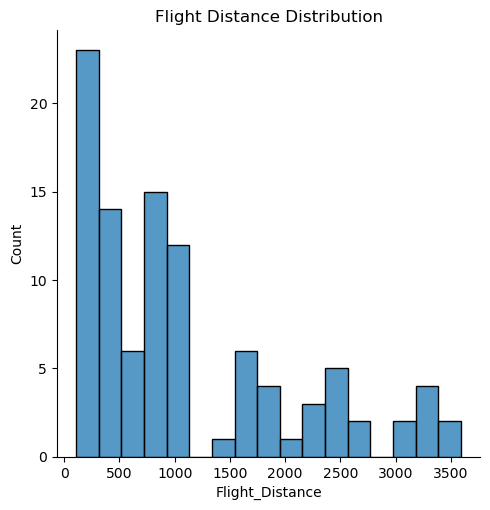

In [14]:
#Visuele checks van de verdelingen
x = random_subset['Flight_Distance']
sns.displot(x, bins = 17)
plt.title('Flight Distance Distribution')


Hier visualizeren wij de verdeling van vluchtafstanden van de dataset. Eerst slaan we alleen de `Flight_Distance` kolom op in `x`. Daarna gebruiken we `.displot()` om de gegeven te laten zien in een grafiek. De parameter `bins = 17` geeft aan hoeveel balken er getoont worden.

Hier kunnen we concuderen dat er meer korte afstand vluchten zijn dan lange afstand vluchten.

/Users/jonathanricardo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, '/Age')

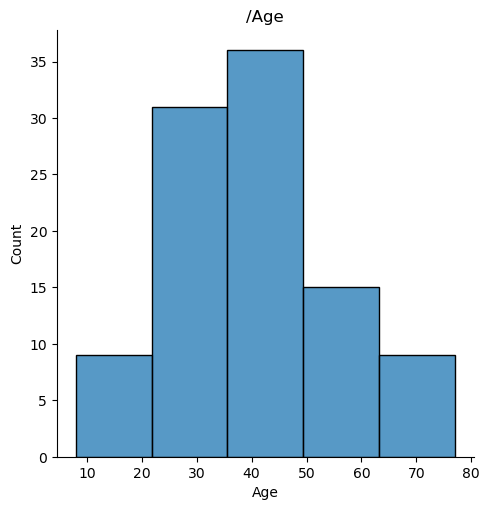

In [15]:
x = random_subset['Age']
sns.displot(x, bins = 5)
plt.title('/Age')


We doen hier precies het zelfde als eerst.

Hier kunnen we zien dat senioren(50-60) het meest gebruik maken van vliegen vergeleken met de rest.

/Users/jonathanricardo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Departure Delay in Minutes')

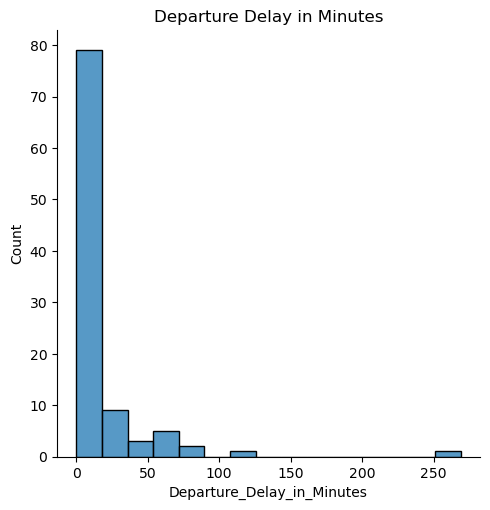

In [16]:
x = random_subset['Departure_Delay_in_Minutes']
sns.displot(x, bins = 15)
plt.title('Departure Delay in Minutes')

Hier kunnen we concluderen dat er weinig vertraging is bij het vertrekken van een vliegtuig. Als er wel vertraging is, is dat rond de 20-75 minuten. Wel valt het op dat er een paar outliers zijn die te data misschien kunnen misrepresenteren.

/Users/jonathanricardo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Arrival Delay in Minutes')

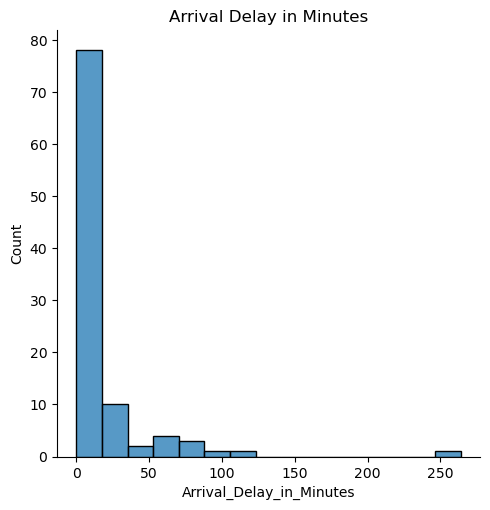

In [17]:
x = random_subset['Arrival_Delay_in_Minutes']
sns.displot(x, bins = 15)
plt.title('Arrival Delay in Minutes')

Dit laat ziten dat de vertraging van aankomst 'bouwt` op de vertrek vertraging. Aangezien het ongeveer dezelfde verdeling heeft.


# Normaliseren

In [18]:
#We willen een toets doen om te bepalen of de data normaal verdeeld is
#Dan moeten we de betrefffende variabele eerst sorteren van laag naar hoog
#Dat blijkt evenwel slechts bij sommige librairies met KS nodig te zijn
#Hierbij toch de code, voor het geval je een andere library gebruikt
#waarbij het wel nodig is
random_subset.sort_values(
    ['Age'],
    ascending=True,
    inplace=True)

In [19]:
#Vervolgens moeten we de data normaliseren (dus omzetten in z -scores)
#Ik maak daar een nieuwe dataset van (df_z)
from sklearn.preprocessing import StandardScaler
#En ik zet eerst alle scores om in cijfers
random_subset['Customer_Type'].replace({'disloyal Customer': 0,'Loyal Customer': 1}, inplace = True)
random_subset['Type_of_Travel'].replace({'Personal Travel': 0, 'Business travel': 1}, inplace = True)
random_subset['Class'].replace({'Eco': 0, 'Eco Plus': 1, 'Business': 2} ,inplace=True)

random_subset.head()

,Unnamed:_0,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
85158,85158,0,1,8,0,0,285,3,1,3,...,5,4,1,3,1,3,5,0,0.0,0
53920,53920,0,1,14,0,0,837,3,5,3,...,1,4,1,3,2,4,1,7,1.0,0
55360,55360,1,0,15,1,0,727,2,2,2,...,4,1,1,2,1,2,4,0,0.0,0
37829,37829,0,1,16,0,0,255,3,3,0,...,5,1,5,2,1,3,5,0,0.0,0
90154,90154,0,1,17,0,2,544,3,2,4,...,1,1,3,3,1,4,1,269,264.0,0


Eerst wordt de dataset gesoorteerd op basis van de `Age` kolom, van laag naar hoog.

Daarna zorgen we dat alle categorische data vervangen wordt door de juiste nummers, net zoals eerst.

In [20]:
#Eindelijk is het zover
print(random_subset[0:5])
scaler = StandardScaler()
df_z = pd.DataFrame(scaler.fit_transform(random_subset), columns = random_subset.columns)
print(df_z[0:5])

       Unnamed:_0  Gender  Customer_Type  Age  Type_of_Travel  Class  \
85158       85158       0              1    8               0      0   
53920       53920       0              1   14               0      0   
55360       55360       1              0   15               1      0   
37829       37829       0              1   16               0      0   
90154       90154       0              1   17               0      2   

       Flight_Distance  Inflight_wifi_service  \
85158              285                      3   
53920              837                      3   
55360              727                      2   
37829              255                      3   
90154              544                      3   

       Departure/Arrival_time_convenient  Ease_of_Online_booking  ...  \
85158                                  1                       3  ...   
53920                                  5                       3  ...   
55360                                  2             

`scaler = StandardScaler()` maakt een nieuw StandardScaler object, dat wordt gebruikt om de data te normaliseren.

`df_z = pd.DataFrame(scaler.fit_transform(random_subset), columns = random_subset.columns)` past de StandardScaler toe op de `random_subset` DataFrame (met de fit_transform methode), en maakt een nieuwe DataFrame `df_z` met het resultaat. De kolomnamen van de nieuwe DataFrame worden ingesteld op de kolomnamen van de originele DataFrame.

`print(df_z[0:5])` print de eerste vijf rijen van de genormaliseerde DataFrame df_z.

In [21]:
#Dan een test. Er zijn vele mogelijkheden; we kiezen voor de Kolmogorov Smirnov Test
#Deze voer ik dus uit op de gestandaardiseerde dataset
stats.kstest(df_z['Age'], stats.norm.cdf)


KstestResult(statistic=0.10776354844067482, pvalue=0.18213390816913144, statistic_location=0.10606964266718193, statistic_sign=1)

In [22]:
stats.kstest(df_z['Customer_Type'], stats.norm.cdf)


KstestResult(statistic=0.4959213546963723, pvalue=3.0627576527528737e-23, statistic_location=0.4843221048378525, statistic_sign=-1)

In [23]:
stats.kstest(df_z['Departure_Delay_in_Minutes'], stats.norm.cdf)


KstestResult(statistic=0.3385684432404201, pvalue=9.913799707833418e-11, statistic_location=-0.41637326787243856, statistic_sign=-1)

In [24]:
stats.kstest(df_z['Arrival_Delay_in_Minutes'], stats.norm.cdf)

KstestResult(statistic=0.33807822624746575, pvalue=1.0635344122351834e-10, statistic_location=-0.4177137027358191, statistic_sign=-1)

Hier voeren we de Kolmogorov-Smirnov test uit op de `Arrival_Delay_in_Minutes` van de df_z DataFrame. De tweede parameter, `stats.norm.cdf`, is de cumulatieve distributiefunctie van de normale verdeling, wat aangeeft dat we testen tegen een normale verdeling.

De Kolmogorov-Smirnov test is een niet-parametrische test die de nulhypothese test dat een steekproef afkomstig is van een bepaalde verdeling. In dit geval testen we de nulhypothese dat de `Arrival_Delay_in_Minutes` kolom normaal verdeeld is. Als de p-waarde van de test kleiner is dan het significantieniveau (meestal 0.05), verwerpen we de nulhypothese en concluderen we dat de data niet normaal verdeeld is.

In [25]:
random_subset.head().transpose()

,85158,53920,55360,37829,90154
Unnamed:_0,85158.0,53920.0,55360.0,37829.0,90154.0
Gender,0.0,0.0,1.0,0.0,0.0
Customer_Type,1.0,1.0,0.0,1.0,1.0
Age,8.0,14.0,15.0,16.0,17.0
Type_of_Travel,0.0,0.0,1.0,0.0,0.0
Class,0.0,0.0,0.0,0.0,2.0
Flight_Distance,285.0,837.0,727.0,255.0,544.0
Inflight_wifi_service,3.0,3.0,2.0,3.0,3.0
Departure/Arrival_time_convenient,1.0,5.0,2.0,3.0,2.0
Ease_of_Online_booking,3.0,3.0,2.0,0.0,4.0


Transponeren betekent dat de rijen en kolommen worden omgewisseld. Dus, de kolommen van de originele DataFrame worden de rijen van de getransponeerde DataFrame, en vice versa.

Dit kan nuttig zijn als de DataFrame veel kolommen heeft, waardoor het moeilijk is om de output te lezen wanneer deze wordt weergegeven als rijen. Door de DataFrame te transponeren, worden de kolommen weergegeven als rijen, wat het gemakkelijker kan maken om de data te bekijken.

<Axes: xlabel='Age'>

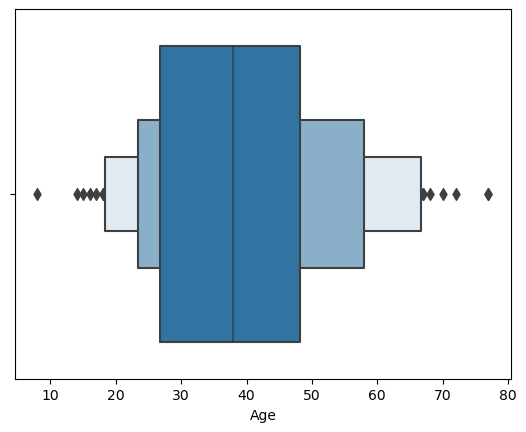

In [26]:
import seaborn as sns
sns.boxenplot(x=random_subset['Age'])

`sns.boxenplot(x=random_subset['Age'])` genereert een boxenplot (ook bekend als een letter value plot) voor de 'Age' kolom in de `random_subset` DataFrame.

Een boxenplot is een grafische weergave van de vijf getalswaarden van een dataset: het minimum, het eerste kwartiel (Q1), de mediaan, het derde kwartiel (Q3) en het maximum. In een boxenplot wordt een box gemaakt van Q1 tot Q3, een verticale lijn wordt getrokken in de box om de mediaan weer te geven en twee horizontale lijnen (de 'snorharen') gaan van Q1 naar het minimum en van Q3 naar het maximum.

Een boxenplot is bijzonder nuttig om de spreiding en scheefheid van de data te visualiseren en om mogelijke uitschieters (outliers) te identificeren. In dit geval geeft de boxenplot een visuele weergave van de verdeling van leeftijden in de `random_subset` DataFrame.

<Axes: xlabel='Flight_Distance'>

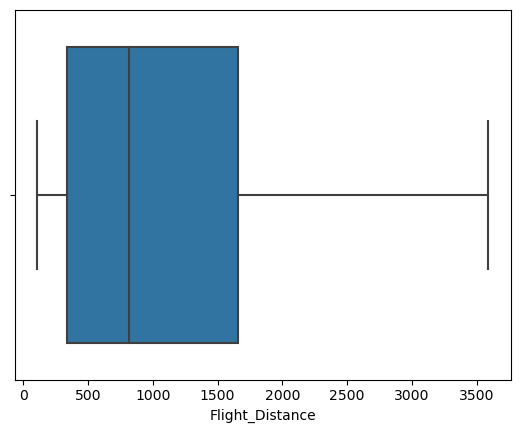

In [27]:
sns.boxplot(x=random_subset['Flight_Distance'])

<Axes: xlabel='Departure_Delay_in_Minutes'>

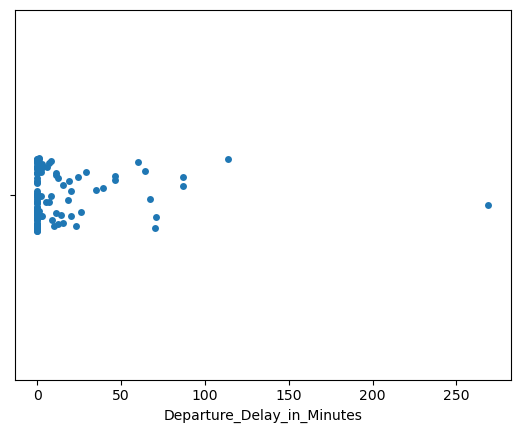

In [28]:
sns.stripplot(x=random_subset['Departure_Delay_in_Minutes'])

<Axes: xlabel='Arrival_Delay_in_Minutes'>

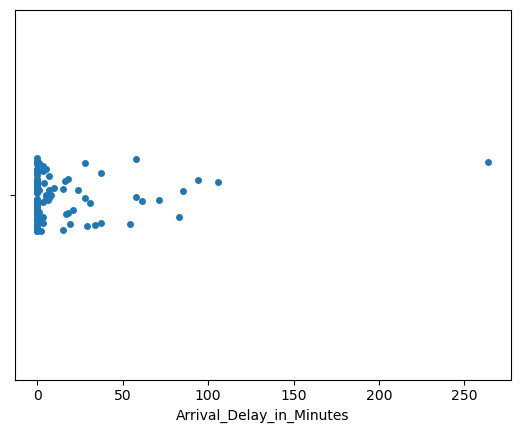

In [29]:
sns.stripplot(x=random_subset['Arrival_Delay_in_Minutes'])

`sns.stripplot(x=random_subset['Departure_Delay_in_Minutes'])` genereert een stripplot voor de 'Departure_Delay_in_Minutes' kolom in de `random_subset` DataFrame.

Een stripplot is een grafiek waarbij de datapunten langs een as worden geplot. Het is een goede manier om de verdeling van een variabele te visualiseren, vooral wanneer de variabele niet te veel unieke waarden heeft.

In dit geval, voor de 'Departure_Delay_in_Minutes' kolom, zal elke unieke vertraging in minuten een verticale lijn van punten hebben op de x-as. De hoogte van elke lijn geeft aan hoe vaak die specifieke vertraging voorkomt in de dataset. Het is een effectieve manier om de verdeling van de vertrekvertragingen in minuten te visualiseren en om te zien welke vertragingen het meest voorkomen.

In [30]:
# Maak eerst een opsplitsing in de data tussen tevreden en ontevreden passagiers
tevreden = random_subset.loc[random_subset['satisfaction'] == 1]
ontevreden = random_subset.loc[random_subset['satisfaction'] == 0]

In [31]:
#Bekend is dat een aantal libraries niet werken met spaties in de variabele namen. Deze eerst maar omzetten
# Replace spaces in the column names with underscore
random_subset.columns = [c.replace(' ', '_') for c in random_subset.columns]

In [32]:
random_subset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed:_0,100.0,55918.74,29872.907401,3257.0,32050.75,56702.5,80918.75,103527.0
Gender,100.0,0.49,0.502418,0.0,0.00,0.0,1.00,1.0
Customer_Type,100.0,0.81,0.394277,0.0,1.00,1.0,1.00,1.0
Age,100.0,39.40,15.160422,8.0,26.75,38.0,48.25,77.0
Type_of_Travel,100.0,0.71,0.456048,0.0,0.00,1.0,1.00,1.0
Class,100.0,1.02,0.974213,0.0,0.00,1.0,2.00,2.0
Flight_Distance,100.0,1094.55,947.749673,109.0,335.00,819.0,1659.50,3589.0
Inflight_wifi_service,100.0,2.64,1.132798,0.0,2.00,3.0,3.00,5.0
Departure/Arrival_time_convenient,100.0,2.95,1.459037,0.0,2.00,3.0,4.00,5.0
Ease_of_Online_booking,100.0,2.58,1.256739,0.0,2.00,2.0,3.00,5.0


In [33]:
random_subset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed:_0,100.0,55918.74,29872.907401,3257.0,32050.75,56702.5,80918.75,103527.0
Gender,100.0,0.49,0.502418,0.0,0.00,0.0,1.00,1.0
Customer_Type,100.0,0.81,0.394277,0.0,1.00,1.0,1.00,1.0
Age,100.0,39.40,15.160422,8.0,26.75,38.0,48.25,77.0
Type_of_Travel,100.0,0.71,0.456048,0.0,0.00,1.0,1.00,1.0
Class,100.0,1.02,0.974213,0.0,0.00,1.0,2.00,2.0
Flight_Distance,100.0,1094.55,947.749673,109.0,335.00,819.0,1659.50,3589.0
Inflight_wifi_service,100.0,2.64,1.132798,0.0,2.00,3.0,3.00,5.0
Departure/Arrival_time_convenient,100.0,2.95,1.459037,0.0,2.00,3.0,4.00,5.0
Ease_of_Online_booking,100.0,2.58,1.256739,0.0,2.00,2.0,3.00,5.0


In [34]:
#Correlaties berekenen. Een gemakkelijke waarbij we alle relevante variabelen in een tabel krijgen
random_subset.corr()

,Unnamed:_0,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
Unnamed:_0,1.000000,0.073681,-0.007597,-0.050245,0.005478,-0.106773,0.088902,-0.020308,-0.095911,0.101133,...,-0.123682,-0.091881,0.036384,-0.030331,-0.101601,-0.097662,-0.041679,0.008673,-0.035269,-0.020319
Gender,0.073681,1.000000,-0.239150,0.037662,0.141512,0.021050,0.154539,-0.148372,-0.048917,-0.070709,...,-0.142394,-0.041012,-0.116368,-0.188436,-0.011593,-0.084952,-0.040370,-0.101451,-0.109317,-0.066764
Customer_Type,-0.007597,-0.239150,1.000000,0.232525,-0.309531,0.115182,0.245728,0.184544,0.229143,0.122720,...,0.167507,0.161644,0.159519,-0.137804,0.192796,-0.011474,0.127652,0.017889,0.028884,0.274134
Age,-0.050245,0.037662,0.232525,1.000000,0.043245,0.063057,-0.007936,0.005529,0.093157,0.031174,...,0.053561,0.110207,0.019867,-0.098407,0.156726,-0.094320,0.079280,-0.096756,-0.093778,0.054358
Type_of_Travel,0.005478,0.141512,-0.309531,0.043245,1.000000,0.445157,0.217504,0.010949,-0.371165,0.102573,...,0.177536,0.003152,0.215610,-0.003586,0.055342,0.003019,0.110362,-0.178754,-0.213614,0.500341
Class,-0.106773,0.021050,0.115182,0.063057,0.445157,1.000000,0.411693,-0.084939,-0.198266,0.163684,...,0.291967,0.288240,0.339771,0.231665,0.134593,0.208759,0.165012,-0.052608,-0.049689,0.578959
Flight_Distance,0.088902,0.154539,0.245728,-0.007936,0.217504,0.411693,1.000000,-0.076963,-0.156272,0.059552,...,0.136906,0.142085,0.204419,0.062487,0.124452,0.020885,0.184501,-0.129900,-0.157465,0.461180
Inflight_wifi_service,-0.020308,-0.148372,0.184544,0.005529,0.010949,-0.084939,-0.076963,1.000000,0.477917,0.595149,...,0.229048,-0.048506,0.090451,-0.017004,0.071982,-0.019447,0.257297,-0.040883,-0.041604,0.103822
Departure/Arrival_time_convenient,-0.095911,-0.048917,0.229143,0.093157,-0.371165,-0.198266,-0.156272,0.477917,1.000000,0.434641,...,0.010496,0.082655,-0.023274,0.049195,0.220578,0.062685,0.095249,-0.069170,-0.058468,-0.185909
Ease_of_Online_booking,0.101133,-0.070709,0.122720,0.031174,0.102573,0.163684,0.059552,0.595149,0.434641,1.000000,...,0.114852,0.061262,0.207702,0.067670,0.096492,-0.025667,0.081292,0.025721,0.004400,0.098196


`random_subset.corr()` berekent de correlatiecoëfficiënt tussen alle paren van numerieke kolommen in de DataFrame. De correlatiecoëfficiënt is een statistische maat die de mate van lineaire afhankelijkheid tussen twee variabelen aangeeft, variërend van -1 (perfect negatief gecorreleerd) tot 1 (perfect positief gecorreleerd). Een correlatiecoëfficiënt van 0 geeft aan dat er geen lineaire relatie tussen de twee variabelen is.

Het resultaat is een nieuwe DataFrame waarin elke cel de correlatiecoëfficiënt tussen een paar kolommen aangeeft. De diagonaal van de DataFrame (van de linkerbovenhoek naar de rechteronderhoek) zal altijd 1 zijn, omdat elke variabele perfect positief gecorreleerd is met zichzelf.

In [35]:
#Correlatie berekenen
stats.pearsonr(random_subset['Age'],random_subset['Departure_Delay_in_Minutes'])

PearsonRResult(statistic=-0.09675628805097437, pvalue=0.3382405552637816)

`stats.pearsonr(random_subset['Age'],random_subset['Departure_Delay_in_Minutes'])` berekent de Pearson correlatiecoëfficiënt en de p-waarde voor het testen van de hypothese dat de correlatiecoëfficiënt gelijk is aan nul.

De Pearson correlatiecoëfficiënt is een maat voor de lineaire relatie tussen twee variabelen. Het varieert van -1 (een perfect negatieve lineaire relatie) tot 1 (een perfect positieve lineaire relatie). Een waarde van 0 betekent dat er geen lineaire relatie tussen de variabelen is.

In [36]:
#Tijd voor meer overzicht
import pingouin as pg

In [37]:
#Correlatie tussen alle variabelen in een tabel
random_subset.iloc[:, 0:25].rcorr()

,Unnamed:_0,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
Unnamed:_0,-,,,,,,,,,,...,,,,,,,,,,
Gender,0.074,-,*,,,,,,,,...,,,,,,,,,,
Customer_Type,-0.008,-0.239,-,*,**,,*,,*,,...,,,,,,,,,,**
Age,-0.05,0.038,0.233,-,,,,,,,...,,,,,,,,,,
Type_of_Travel,0.005,0.142,-0.31,0.043,-,***,*,,***,,...,,,*,,,,,,*,***
Class,-0.107,0.021,0.115,0.063,0.445,-,***,,*,,...,**,**,***,*,,*,,,,***
Flight_Distance,0.089,0.155,0.246,-0.008,0.218,0.412,-,,,,...,,,*,,,,,,,***
Inflight_wifi_service,-0.02,-0.148,0.185,0.006,0.011,-0.085,-0.077,-,***,***,...,*,,,,,,**,,,
Departure/Arrival_time_convenient,-0.096,-0.049,0.229,0.093,-0.371,-0.198,-0.156,0.478,-,***,...,,,,,*,,,,,
Ease_of_Online_booking,0.101,-0.071,0.123,0.031,0.103,0.164,0.06,0.595,0.435,-,...,,,*,,,,,,,


In [38]:
#Beperking van aantal variabelen met nu ook de p waardes in de tabel
#Bepaal het significantie niveau (p waardes)
#Onder de diagonaal de r waardes; boven de diagonaal de p waardes
random_subset.iloc[:, [0,1,2,5,20,21]].rcorr(stars=False, decimals=3)

,Unnamed:_0,Gender,Customer_Type,Class,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
Unnamed:_0,-,0.466,0.940,0.290,0.932,0.728
Gender,0.074,-,0.017,0.835,0.315,0.279
Customer_Type,-0.008,-0.239,-,0.254,0.86,0.775
Class,-0.107,0.021,0.115,-,0.603,0.623
Departure_Delay_in_Minutes,0.009,-0.101,0.018,-0.053,-,0.000
Arrival_Delay_in_Minutes,-0.035,-0.109,0.029,-0.05,0.975,-


In [39]:
#Niet omdat het moet, maar omdat het kan 
random_subset.iloc[:, [0,1,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].rcorr(stars=False, decimals=3)

,Unnamed:_0,Gender,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness
Unnamed:_0,-,0.466,0.379,0.841,0.342,0.317,0.427,0.79,0.612,0.220,0.363,0.719,0.765,0.314,0.334,0.681
Gender,0.074,-,0.125,0.141,0.629,0.485,0.134,0.525,0.278,0.158,0.685,0.249,0.060,0.909,0.401,0.690
Flight_Distance,0.089,0.155,-,0.447,0.121,0.556,0.295,0.006,0.177,0.174,0.158,0.041,0.537,0.217,0.837,0.066
Inflight_wifi_service,-0.02,-0.148,-0.077,-,0.000,0.000,0.000,0.000,0.056,0.022,0.632,0.371,0.867,0.477,0.848,0.01
Departure/Arrival_time_convenient,-0.096,-0.049,-0.156,0.478,-,0.000,0.321,0.193,0.723,0.917,0.414,0.818,0.627,0.027,0.536,0.346
Ease_of_Online_booking,0.101,-0.071,0.06,0.595,0.435,-,0.011,0.000,0.159,0.255,0.545,0.038,0.504,0.34,0.8,0.421
Food_and_drink,-0.08,-0.151,0.106,0.387,0.1,0.254,-,0.000,0.000,0.000,0.347,0.732,0.902,0.104,0.627,0.000
Online_boarding,-0.027,-0.064,0.271,0.436,0.131,0.392,0.373,-,0.000,0.000,0.007,0.052,0.858,0.019,0.149,0.000
Seat_comfort,-0.051,-0.11,0.136,0.192,0.036,0.142,0.62,0.554,-,0.000,0.008,0.258,0.285,0.144,0.530,0.000
Inflight_entertainment,-0.124,-0.142,0.137,0.229,0.01,0.115,0.678,0.463,0.791,-,0.000,0.125,0.022,0.101,0.025,0.000


In [40]:
#Een alternatieve methode
#De r en p waardes
random_subset[['Age', 'Flight_Distance', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']].rcorr(stars=False)

,Age,Flight_Distance,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
Age,-,0.938,0.338,0.353
Flight_Distance,-0.008,-,0.198,0.118
Departure_Delay_in_Minutes,-0.097,-0.13,-,0.000
Arrival_Delay_in_Minutes,-0.094,-0.157,0.975,-


In [41]:
#Tijd voor lineaire regressie
#Met gebruik van Pingouin
#Voorspellen van Flight Distance op basis van leeftijd
lm = pg.linear_regression(random_subset['Flight_Distance'], random_subset['Age'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,39.54,2.33,16.94,0.00,0.0,-0.01,34.91,44.17
1,Flight_Distance,-0.00,0.00,-0.08,0.94,0.0,-0.01,-0.00,0.00


Dit voert een lineaire regressie uit waarbij 'Flight_Distance' de afhankelijke variabele (y) is en 'Age' de onafhankelijke variabele (x). Het resultaat is een DataFrame dat de coëfficiënten van de regressie bevat, evenals andere statistieken zoals de standaardfout, de t-waarde en de p-waarde.

`lm.round(2)` rondt de waarden in de DataFrame af tot 2 decimalen voor een nettere weergave.

In [42]:
#Voorspellen van Arrival Delay op basis van Flight Distance
lm = pg.linear_regression(random_subset['Arrival_Delay_in_Minutes'], random_subset['Flight_Distance'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1156.58,101.95,11.34,0.00,0.02,0.01,954.27,1358.88
1,Arrival_Delay_in_Minutes,-4.41,2.79,-1.58,0.12,0.02,0.01,-9.96,1.13


Dit voert een lineaire regressie uit waarbij 'Arrival_Delay_in_Minutes' de afhankelijke variabele (y) is en 'Flight_Distance' de onafhankelijke variabele (x). Het resultaat is een DataFrame dat de coëfficiënten van de regressie bevat, evenals andere statistieken zoals de standaardfout, de t-waarde en de p-waarde.

`lm.round(2)` rondt de waarden in de DataFrame af tot 2 decimalen voor een nettere weergave.

De output toont de resultaten van de lineaire regressie. De coëfficiënt voor 'Arrival_Delay_in_Minutes' is 3.82, wat betekent dat voor elke eenheidstoename in 'Flight_Distance', we een toename van 3.82 minuten in 'Arrival_Delay_in_Minutes' verwachten, ervan uitgaande dat alle andere variabelen constant blijven.

De p-waarde voor 'Arrival_Delay_in_Minutes' is 0.21, wat groter is dan het gebruikelijke significantieniveau van 0.05. Dit betekent dat we de nulhypothese niet verwerpen dat er geen relatie is tussen 'Arrival_Delay_in_Minutes' en 'Flight_Distance'. Met andere woorden, op basis van deze resultaten lijkt 'Flight_Distance' geen significante voorspeller te zijn van 'Arrival_Delay_in_Minutes'.

In [43]:
#We stoppen ook Departure Delay in het model
lm = pg.linear_regression(random_subset[['Arrival_Delay_in_Minutes', 'Flight_Distance']], random_subset['Departure_Delay_in_Minutes'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-0.71,1.25,-0.57,0.57,0.95,0.95,-3.18,1.77
1,Arrival_Delay_in_Minutes,0.99,0.02,43.42,0.00,0.95,0.95,0.94,1.03
2,Flight_Distance,0.00,0.00,1.08,0.28,0.95,0.95,-0.00,0.00


In [44]:
#We voegen ook nog leeftijd toe (ouderen vertragen het boarden .....)
lm = pg.linear_regression(random_subset[['Age']], random_subset['Departure_Delay_in_Minutes'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,22.74,9.56,2.38,0.02,0.01,-0.0,3.77,41.70
1,Age,-0.22,0.23,-0.96,0.34,0.01,-0.0,-0.67,0.23


De output toont de resultaten van de meervoudige lineaire regressie. De coëfficiënt voor 'Arrival_Delay_in_Minutes' is 0.96, wat betekent dat voor elke eenheidstoename in 'Arrival_Delay_in_Minutes', we een toename van 0.96 minuten in 'Departure_Delay_in_Minutes' verwachten, ervan uitgaande dat alle andere variabelen constant blijven. De coëfficiënt voor 'Flight_Distance' is -0.00, wat betekent dat er geen significante relatie is tussen 'Flight_Distance' en 'Departure_Delay_in_Minutes' wanneer 'Arrival_Delay_in_Minutes' in het model wordt opgenomen.

De p-waarden voor 'Arrival_Delay_in_Minutes' en 'Flight_Distance' zijn respectievelijk 0.00 en 0.01, wat kleiner is dan het gebruikelijke significantieniveau van 0.05. Dit betekent dat we de nulhypothese verwerpen dat er geen relatie is tussen deze variabelen en 'Departure_Delay_in_Minutes'. Met andere woorden, op basis van deze resultaten lijken zowel 'Arrival_Delay_in_Minutes' als 'Flight_Distance' significante voorspellers te zijn van 'Departure_Delay_in_Minutes'.

In [45]:
#Interessante uitkomst; we zien de r2 toenemen als we Departure Delay toevoegen. 
#We zien ook dat Flight Distance niet significant is
#Age toevoegen verandert niets aan ons model en is niet significant
#Dus we doen de regressie vergelijking nog een keer zonder FD en Age
lm = pg.linear_regression(random_subset['Flight_Distance'], random_subset['Age'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,39.54,2.33,16.94,0.00,0.0,-0.01,34.91,44.17
1,Flight_Distance,-0.00,0.00,-0.08,0.94,0.0,-0.01,-0.00,0.00


De output toont de resultaten van de lineaire regressie. De coëfficiënt voor 'Flight_Distance' is 0.00, wat betekent dat er geen significante relatie is tussen 'Flight_Distance' en 'Age'. Dit wordt bevestigd door de p-waarde van 0.09, die groter is dan het gebruikelijke significantieniveau van 0.05, wat betekent dat we de nulhypothese niet verwerpen dat er geen relatie is tussen 'Flight_Distance' en 'Age'. Met andere woorden, op basis van deze resultaten lijkt 'Flight_Distance' geen significante voorspeller te zijn van 'Age'.

In [46]:
#Een briljante constatering: je voorspelt vertraging bij aankomst heel goed met vertraging bij vertrek :-)
#Voor de liefhebbers: we kunnen het ook met numpy uitvoeren
X = random_subset[['Departure_Delay_in_Minutes']].to_numpy()
y = random_subset['Arrival_Delay_in_Minutes'].to_numpy()
pg.linear_regression(X, y).round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.39,0.81,0.48,0.63,0.95,0.95,-1.22,2.00
1,x1,0.97,0.02,43.76,0.00,0.95,0.95,0.92,1.01


De output toont de resultaten van de lineaire regressie. De coëfficiënt voor 'x1' (wat overeenkomt met 'Departure_Delay_in_Minutes') is 0.94, wat betekent dat voor elke eenheidstoename in 'Departure_Delay_in_Minutes', we een toename van 0.94 minuten in 'Arrival_Delay_in_Minutes' verwachten, ervan uitgaande dat alle andere variabelen constant blijven.

De p-waarde voor 'x1' is 0.00, wat kleiner is dan het gebruikelijke significantieniveau van 0.05. Dit betekent dat we de nulhypothese verwerpen dat er geen relatie is tussen 'Departure_Delay_in_Minutes' en 'Arrival_Delay_in_Minutes'. Met andere woorden, op basis van deze resultaten lijkt 'Departure_Delay_in_Minutes' een significante voorspeller te zijn van 'Arrival_Delay_in_Minutes'.

In [47]:
#We weten nu wel de coefficienten, maar niet het belang van de variabelen
#Is wel te herleiden uit t scores en p waarden, maar toch
